In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat

from scipy import optimize

In [13]:

df = pd.read_excel(r'C:\Users\Hayden Swanson\OneDrive\HaydSwanMeta\JupyterCode\Physics 422\MalusLaw.xlsx',sheet_name='FiberB')
degrees = np.array(df['Degree'].to_list())
print(degrees)
voltage = np.array(df['Volts (New Polarizor)'].to_list())
print(voltage)

[ 30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180 190 200
 210 220]
[0.13 0.09 0.13 0.24 0.41 0.61 0.83 1.04 1.2  1.3  1.32 1.26 1.15 0.99
 0.8  0.59 0.39 0.22 0.12 0.09]


0.009752233146660086
Amp=1.3507947794293642, phi=0.8856714310094328


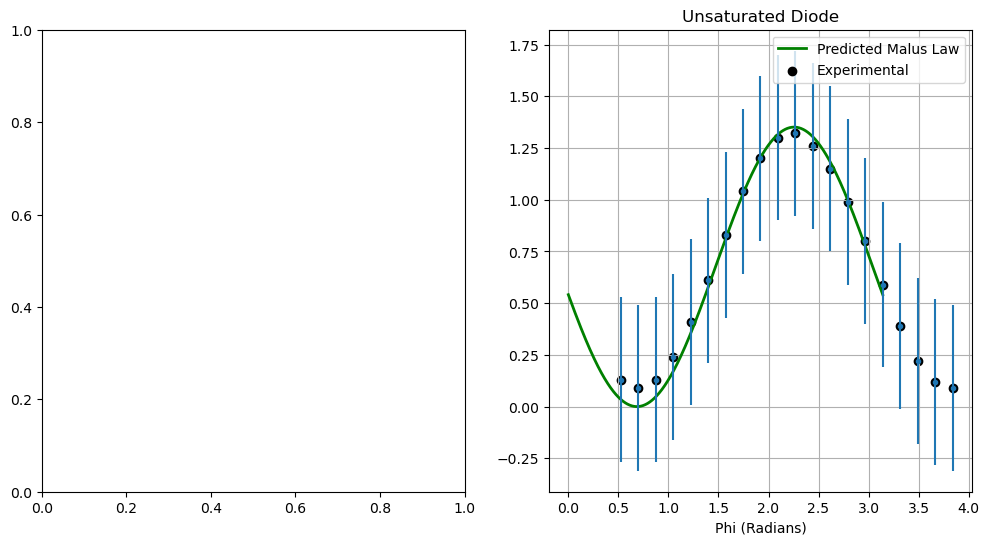

[1.3507947794293642, 0.8856714310094328]

In [14]:

t_gen = np.radians(degrees)
y_gen = voltage

def calc_fit(x,y):
    
    def cos2(x, A, phi):
        y = A*np.square(np.cos(x+phi))
        return y


    popt, pcov = optimize.curve_fit(cos2, xdata = t_gen, ydata = y_gen)

    residuals = (y_gen - cos2(t_gen, *popt))
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_gen-np.mean(y_gen))**2)

    r_squared = 1 - ss_res/ss_tot
    #print(r_squared)
    chi2 = ss_res/0.4 #divide residual by uncertainty
    reduced_chi2 = chi2/17 #19 points, 2 fitting parameters
    print(reduced_chi2)
    print(f'Amp={popt[0]}, phi={popt[1]}')

    angles = np.linspace(0,np.pi,1000)
    result = [popt[0]*np.square(np.cos(i+popt[1])) for i in angles]

    #plotting fitting variables
    fig, axs = plt.subplots(ncols=2, figsize = (12,6))
    
    #over_V = np.array(df['Volts (Diode Overload)'].to_list())
#     axs[0].plot(angles, 110*np.square(np.cos(angles+np.pi/2+0.005*np.pi)),color='green',label='Predicted Malus Law')
#     axs[0].plot(np.radians(degrees), over_V)
#     axs[0].scatter(np.radians(degrees), over_V,color='black',label='Experimental')
#     axs[0].set_title('Saturated Diode')
#     axs[0].set_ylabel('Voltage (volts)')
#     axs[0].set_xlabel('Phi (Radians)')
#     axs[0].grid()
    
    axs[1].plot(angles, result,c='green',ls='-',lw=2,label='Predicted Malus Law')
    axs[1].scatter(t_gen,y_gen,c='black',label='Experimental')
    axs[1].set_xlabel('Phi (Radians)')
    axs[1].errorbar(t_gen, y_gen, yerr=0.4, fmt='.')

    axs[1].set_title('Unsaturated Diode')

    axs[1].grid()
    #axs[0].legend(loc='upper right')
    axs[1].legend(loc='upper right')
    plt.show()
    return [popt[0],popt[1]] #amplitude, phase shift reminder it is 2pi + actual shift
    
calc_fit(t_gen,y_gen)

In [15]:
first = 1.04
second = 0.88

print(np.degrees(1.04-0.88))

9.167324722093174
